<a href="https://colab.research.google.com/github/mirinai/BigdataPhysics_practice/blob/main/week_7_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[320 436]


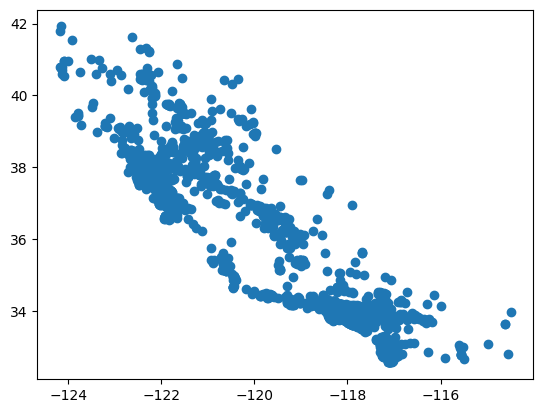

In [44]:
#K-means clustering
from scipy.spatial import distance

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
n=500

cluster = np.zeros(n)
k=2
centroids = np.random.randint(n,size=k)
print(centroids)
def xy_coordinate(n):
  for i in range(n):
    x[i]=np.random.randint(0,2)
    y[i]=np.random.randint(0,2)
  return x,y

'''def initial_coordinate(k):

  k_coordi=np.random.choice(n,2*k)
  k_coordix= np.array(k_coordi[:2])
  k_coordiy= np.array(k_coordi[2:])
  return k_coordix, k_coordiy
'''
x,y=xy_coordinate(n)
#kx,ky=initial_coordinate(k)


'''print(x)
print(y)
print(kx,ky)'''
#def clustering():

'''def
  ex_kx,ex_ky = kx.copy(),ky.copy()
  ds = np.zeros([k,len(x)])
  for i in range(n):
    ds=np.sqrt(abs(ex_kx[i]-kx[i])**2+abs(ex_ky[i]-ky[i])**2)'''


house=pd.read_csv('/content/sample_data/california_housing_test.csv')
x=house['longitude']
y=house['latitude']
plt.scatter(x,y)






In [56]:

def initial_centroid(k,x,y):
  index=np.random.choice(np.arange(len(x)),k,replace=False)
  return np.array([x[index],y[index]])

def clustering(k,x,y,centroid):
  ds=np.zeros([k,len(x)])
  for i in range(k):
    x_center=centroid[0][i]
    y_center=centroid[1][i]
    ds[i]=np.sqrt((x-x_center)**2+(y-y_center)**2)
  return np.argmin(ds,axis=0)
'''
말 그대로 arguments of min, arguments of max란 뜻입니다. 즉, 어떤 함수를 최소/최대로 만드는 정의역의 점들, elements 혹은 매개변수를 말합니다.

예를들어서 다음 수식은 f(x)가 최소값을 갖는 x의 값을 의미합니다.
'''

def move_center(k,x,y,cluster):
  new_clust=np.zeros([2,k])
  for i in range(k):
    new_x,new_y=np.mean(x[cluster==i]), np.mean(y[cluster==i])
    new_clust[0,i]=new_x
    new_clust[1,i]=new_y
  return new_clust


def plot(x,y,d,center):
  plt.scatter(x,y,c=d,cmap='Set2',alpha=0.5)
  for i in range(len(center[0])):
    plt.scatter(center[0][i],center[1][i],c='r',marker='*',s=100)
  plt.show()


'''
initial_centroid(k, x, y):

이 함수는 초기 중심점(centroid)을 랜덤하게 선택합니다.
k는 클러스터의 개수입니다.
x, y는 데이터 포인트의 x좌표와 y좌표를 나타내는 배열입니다.
np.random.choice를 사용하여 x 배열의 길이에서 k개의 중심점 인덱스를 무작위로 선택합니다. replace=False는 중복을 허용하지 않는다는 의미입니다.
선택된 인덱스를 사용하여 x, y 좌표에서 해당하는 중심점을 반환합니다.


clustering(k, x, y, centroid):

이 함수는 각 데이터 포인트를 가장 가까운 중심점에 할당하여 클러스터를 형성합니다.
k는 클러스터의 개수, x, y는 데이터 포인트의 좌표, centroid는 현재 중심점의 좌표입니다.
먼저 각 중심점과 모든 데이터 포인트 간의 거리를 계산합니다. 이를 위해 유클리드 거리 공식을 사용합니다.
np.argmin을 사용하여 각 데이터 포인트가 속하는 클러스터를 결정합니다. 이는 각 데이터 포인트에서 가장 짧은 거리를 가진 중심점의 인덱스를 반환합니다.


move_center(k, x, y, cluster):

이 함수는 클러스터의 새로운 중심점을 계산합니다.
각 클러스터에 속하는 데이터 포인트들의 평균 좌표를 새로운 중심점으로 설정합니다.
cluster 배열은 각 데이터 포인트가 속한 클러스터의 인덱스를 포함하고 있습니다.
클러스터마다 x와 y 좌표의 평균을 계산하여 새로운 중심점을 결정합니다.


plot(x, y, d, center):

이 함수는 클러스터링 결과를 시각화합니다.
x, y는 데이터 포인트의 좌표, d는 각 데이터 포인트가 속한 클러스터의 인덱스, center는 중심점의 좌표입니다.
plt.scatter를 사용하여 데이터 포인트와 중심점을 플롯합니다. 데이터 포인트는 클러스터에 따라 다른 색으로 표시되고, 중심점은 빨간색 별표로 표시됩니다.
plt.show()를 호출하여 그래프를 화면에 표시합니다.
'''

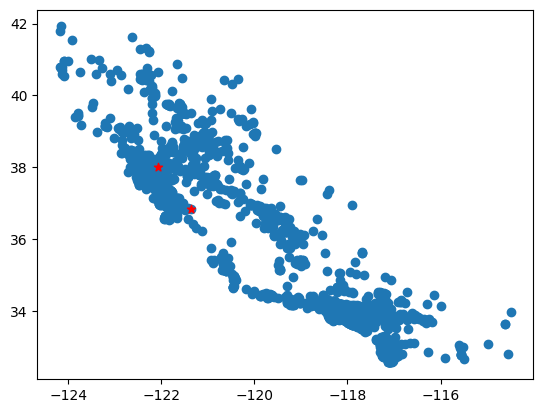

In [57]:

k=2
center=initial_centroid(k,x,y)
plt.scatter(x,y)
plt.scatter(center[0][0],center[1][0],c='r',marker='*')
plt.scatter(center[0][1],center[1][1],c='r',marker='*')

(array([ 247.,    0.,    0.,  494.,    0.,    0., 1475.,    0.,    0.,
         784.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

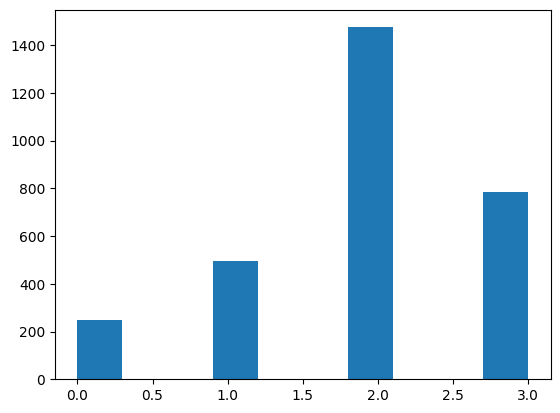

In [58]:

k=4
d=clustering(k,x,y,initial_centroid(k,x,y))
plt.hist(d)

[[-119.29 -122.   -122.2  -122.32]
 [  36.54   37.3    40.26   38.  ]]
----------------
[[-118.17925572 -121.746375   -122.16083333 -122.05901193]
 [  34.17388091   37.3832       40.02439394   38.1407155 ]]


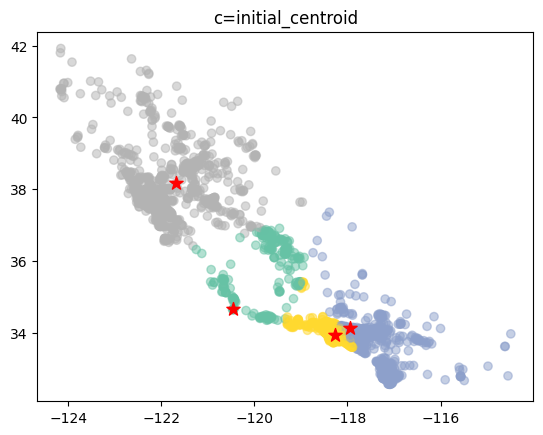

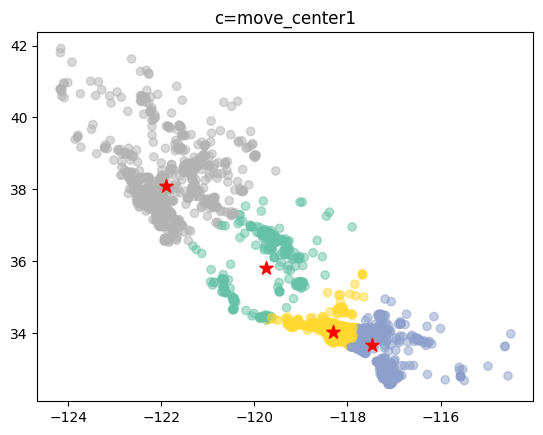

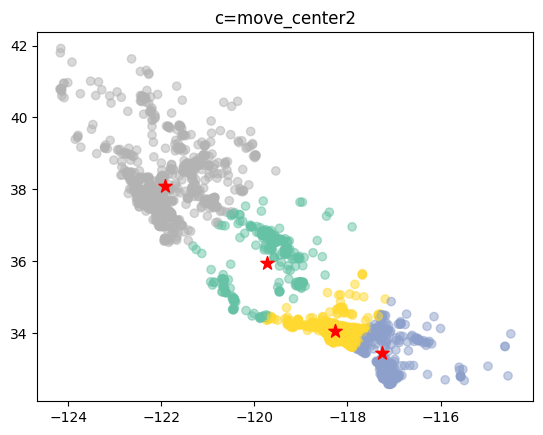

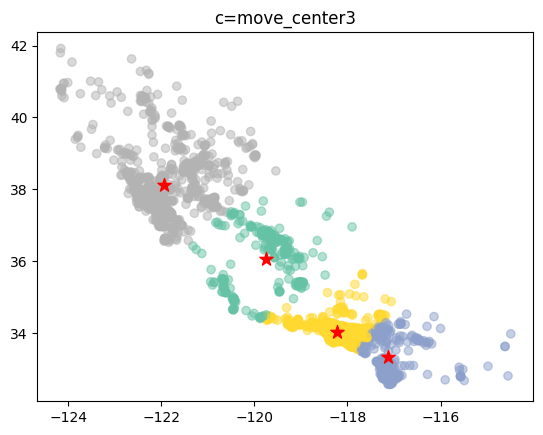

In [64]:

c=initial_centroid(k,x,y)
d=clustering(k,x,y,c)
print(c)
print("----------------")
c=move_center(k,x,y,d)
print(c)
d=clustering(k,x,y,c)

c=initial_centroid(k,x,y)
plt.title("c=initial_centroid")
d=clustering(k,x,y,c)
plot(x,y,d,c)

c=move_center(k,x,y,d)
plt.title("c=move_center1")
d=clustering(k,x,y,c)
plot(x,y,d,c)

c=move_center(k,x,y,d)
plt.title("c=move_center2")
d=clustering(k,x,y,c)
plot(x,y,d,c)

c=move_center(k,x,y,d)
plt.title("c=move_center3")
d=clustering(k,x,y,c)
plot(x,y,d,c)

1. 초기 중심점 설정 (initial_centroid):

클러스터의 초기 중심점을 랜덤하게 선택합니다. 이 선택된 중심점은 초기 클러스터링의 기준이 됩니다.
클러스터링 수행 (clustering):

각 데이터 포인트를 가장 가까운 중심점에 할당하여 클러스터를 형성합니다.

2. 중심점 이동 (move_center):

현재 클러스터의 데이터 포인트들을 기반으로 각 클러스터의 새로운 중심점을 계산합니다. 이는 각 클러스터에 속한 데이터 포인트들의 평균 좌표를 새로운 중심점으로 사용함으로써 이루어집니다.

3. 중심점과 클러스터링 결과 시각화 (plot):

중심점과 클러스터된 데이터 포인트들을 그래프에 표시하여, 클러스터링의 결과를 시각적으로 확인할 수 있습니다. 각 단계에서의 중심점 변화를 관찰하며, 중심점이 점차 데이터의 중심으로 수렴하는 과정을 볼 수 있습니다.





이 과정은 중심점이 더 이상 크게 변하지 않을 때까지, 즉 수렴할 때까지 반복될 수 있습니다. 각 단계에서 중심점의 이동은 클러스터 내의 데이터 포인트들의 평균 위치로 조정되며, 이는 클러스터의 내부 분산을 최소화하여 더 타당한 클러스터 형성을 목표로 합니다.

제공하신 코드의 흐름은 K-평균 알고리즘의 기본 원리와 잘 맞아떨어지며, 각 단계에서 중심점이 어떻게 이동하는지 시각화를 통해 직관적으로 이해할 수 있도록 해줍니다. 이러한 시각적 피드백은 알고리즘의 작동 방식과 효율성을 검증하는 데 매우 유용합니다.

In [29]:
def initial_centroid(x,y,k):
  idx=np.random.choice(np.arange(len(x)),k,replace=False)
  return np.array(x[idx],y[idx])



def clustering(x,y,k,centroid):
  ds = np.zeros([k,len(x)])
  for i in range(k):
    x_center=centroid[0][i]
    y_center=centroid[1][i]
    ds[i]=np.sqrt((x-x_center)**2+(y-y_center)**2)
  return np.argmin(ds,axis=0)

def move_center(x,y,k,cluster):
  new_clust=np.zeros([2,k])
  for i in range(k):
    x_in=x[cluster==i]
    y_in=y[cluster==i]

    new_x,new_y = np.sum(x_in)/np.sum(cluster==i),np.sum(y_in)/np.sum(cluster==i)
    new_clust[0,i]=new_x
    new_clust[1,i]=new_y
  return new_clust


TypeError: Cannot construct a dtype from an array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')